In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score as R2
from sklearn.metrics import mean_squared_error as MSE

In [2]:
data = pd.read_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0318).csv')

In [3]:
country = pd.read_csv('/Users/csuen/Desktop/PhD/Maps/country_province_state_2*2.csv')
data = data.merge(country, how = 'left', left_on = ['longitude','latitude'], right_on = ['longitude','latitude'])
data = data.drop(['province','state'], axis=1)

### First, converse the concentrations in ppb to molecules cm${^{-3}}$

In [4]:
data['o3_mole'] = data['o3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no_mole'] = data['no']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['no2_mole'] = data['no2']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['oh_mole'] = data['oh']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['h2o_mole'] = data['h2o']*1.01325*10**5/data['tas']*7.243*10**7/18.0*28.8
data['hno3_mole'] = data['hno3']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)
data['pan_mole'] = data['pan']*1.01325*10**5/data['tas']*7.243*10**7*(10**9)

data['k_ho2_ho2'] = 3.0*10**(-13)*np.exp(460/data['tas'])
#data['k_oh_no2'] = 1.8*10**(-30)*(300/data['tas'])**3.0
data['k_oh_no2'] = 1.03*10**(-11)
data['k_o1d_h2o'] = 2.14*10**(-10)

data['o3prod_mole'] = data['o3prod']*6.022*10**17
data['o3loss_mole'] = data['o3loss']*6.022*10**17

data['lossch4_mole'] = data['lossch4']*6.022*10**17
data['lossco_mole'] = data['lossco']*6.022*10**17
data['k_ch3o2_ch3o2'] = 1.03*10**(-13)*np.exp(365/data['tas'])
#data['k_oh_oh'] = 6.2*10**(-14)*(data['tas']/298)**2.6*np.exp(945/data['tas'])+3.9*10**(-11)*(data['tas']/300)**(-0.47)
#data['k_oh_oh'] = 3.9*10**(-11)*(data['tas']/300)**(-0.47)
data['k_oh_oh'] = 6.31*10**(-14)*(data['tas']/300)**(2.6)*np.exp(945/data['tas'])
data['k_oh_ho2'] = 4.81*10**(-11)*np.exp(250/data['tas'])
data['k_oh_no'] = 3.3*10**(-11)*(data['tas']/300)**(-0.3)

In [5]:
data['k_oh_no2'].mean()

1.0300000000023207e-11

In [6]:
data['k_oh_oh'].mean()

1.5793465975108942e-12

In [7]:
data['o3loss_mole'].mean()

641872.892380143

In [8]:
data['P4'] = (data['lossco_mole']
              +data['k_o3_oh']*data['o3_mole']*data['oh_mole']
              +data['k_oh_no2']*data['no2_mole']*data['oh_mole']
              +2*data['k_oh_oh']*data['oh_mole']**2
              +data['k_oh_ho2']*data['ho2_mole']*data['oh_mole']
              -data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']
              -data['k_no_ho2']*data['no_mole']*data['ho2_mole']
             )/2
data['P4_frac'] = data['P4']/data['o3loss_mole']
data['P4_frac'].describe()

count    972000.000000
mean          0.313828
std           1.206405
min           0.000054
25%           0.051252
50%           0.099791
75%           0.155485
max         116.562028
Name: P4_frac, dtype: float64

In [9]:
data['P4'] = data['o3_mole']*data['photo1d']*data['k_o1d_h2o']*data['h2o_mole']
data['P4_frac'] = data['P4']/data['o3loss_mole']
data['P4_frac'].describe()

count    972000.000000
mean          0.454733
std           0.253369
min           0.000000
25%           0.270440
50%           0.467505
75%           0.658458
max           3.664274
Name: P4_frac, dtype: float64

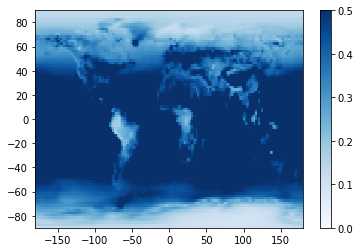

In [10]:
data['loc'] = data['longitude']*1000 + data['latitude']
data_land = data
data_mean = data_land.groupby(['loc']).mean()

cm = plt.cm.get_cmap('Blues')
x = data_mean['longitude']
y = data_mean['latitude']
z = data_mean['P4_frac']
sc = plt.scatter(x, y, c=z, marker="s", vmin=0, vmax=0.5, s=3, cmap=cm)
plt.xlim([-180, 180])
plt.ylim([-90, 90])
plt.colorbar(sc)
plt.show()

In [11]:
data['P5'] = data['k_o3_oh']*data['o3_mole']*data['oh_mole']
data['P5_frac'] = data['P5']/data['o3loss_mole']

In [12]:
data['P6'] = data['k_o3_ho2']*data['o3_mole']*data['ho2_mole']
data['P6_frac'] = data['P6']/data['o3loss_mole']

In [13]:
data['P7'] = data['o3loss_mole'] - data['P4'] - data['P5'] - data['P6']
data['P7_frac'] = data['P7']/data['o3loss_mole']
data['P7_frac'].describe()

count    972000.000000
mean          0.065344
std           0.285728
min          -3.049049
25%          -0.151698
50%           0.000953
75%           0.266371
max           0.997991
Name: P7_frac, dtype: float64

In [14]:
data['ratio_P1_P2'] = data['P1']/data['P2']
data['ratio_P1_P2'].describe()

count    972000.000000
mean          1.632995
std           2.033382
min           0.002828
25%           0.531764
50%           1.068481
75%           2.142160
max         134.400362
Name: ratio_P1_P2, dtype: float64

In [15]:
data['ratio_P5_P6'] = data['P5']/data['P6']
data['ratio_P5_P6'].describe()

count    972000.000000
mean          2.574864
std          15.660226
min           0.008336
25%           0.158606
50%           0.265355
75%           0.661963
max        1340.643521
Name: ratio_P5_P6, dtype: float64

In [16]:
data = data.rename(columns={'country_x':'country'})

In [17]:
data.to_csv('/Volumes/Database/Research/C7 Multivariate analysis/UKESM1-0-LL_diag_2014(0319).csv', index = False)

In [18]:
data_land = data.dropna()
ratio_P1_P2 = data_land['ratio_P1_P2'].median()
ratio_P5_P6 = data_land['ratio_P5_P6'].median()
P1_frac = data_land['P1_frac'].mean()
P2_frac = data_land['P2_frac'].mean()
P3_frac = data_land['P3_frac'].mean()
P4_frac = data_land['P4_frac'].mean()
P5_frac = data_land['P5_frac'].mean()
P6_frac = data_land['P6_frac'].mean()
P7_frac = data_land['P7_frac'].mean()
ratio_ho2_oh = data_land['ratio_ho2_oh'].median()
ratio_ch3o2_oh = data_land['ratio_ch3o2_oh'].median()

In [19]:
print("P1 fraction:    "+str(np.round(P1_frac,2)))
print("P2 fraction:    "+str(np.round(P2_frac,2)))
print("P3 fraction:    "+str(np.round(P3_frac,2)))
print("P4 fraction:    "+str(np.round(P4_frac,2)))
print("P5 fraction:    "+str(np.round(P5_frac,2)))
print("P6 fraction:    "+str(np.round(P6_frac,2)))
print("P7 fraction:    "+str(np.round(P7_frac,2)))
print("P1:P2 ratio:    "+str(np.round(ratio_P1_P2,2)))
print("P5:P6 ratio:    "+str(np.round(ratio_P5_P6,2)))
print("HO\u2082:OH ratio:   "+str(np.round(ratio_ho2_oh,1)))
print("CH\u2083O\u2082:OH ratio: "+str(np.round(ratio_ch3o2_oh,1)))

P1 fraction:    0.33
P2 fraction:    0.24
P3 fraction:    0.43
P4 fraction:    0.34
P5 fraction:    0.13
P6 fraction:    0.3
P7 fraction:    0.23
P1:P2 ratio:    2.13
P5:P6 ratio:    0.84
HO₂:OH ratio:   40.0
CH₃O₂:OH ratio: 16.9
